In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['center_of_mass'] = df['center_of_mass'].apply(ast.literal_eval)

#df['head'] = df['head'].apply(ast.literal_eval)



<AxesSubplot:>

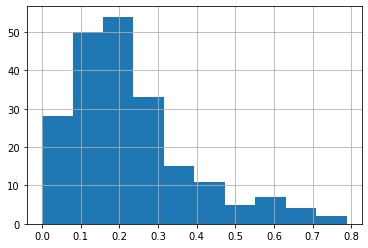

In [2]:
df.tail_uniformity.hist()

In [3]:
#df = df[(df["quadrant"] == 1) & (df["fish_id"] == 1)]

In [4]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])


In [5]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()
for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)    
    cycle_number = 1
    count=0  
    for i in the_idxs:       
        df.loc[i, "cycle"] = cycle_number
        count=count+1        
        if count == 6:
            cycle_number=cycle_number+1
            count = 0 
                
        
            
    
    
    
    

12
Int64Index([1288, 1289, 1290, 1291, 1292, 1293, 1294], dtype='int64', name='frame_number')
34
Int64Index([1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363], dtype='int64', name='frame_number')
193
Int64Index([1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577], dtype='int64', name='frame_number')
195
Int64Index([1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589], dtype='int64', name='frame_number')
308
Int64Index([1736, 1737, 1738, 1739, 1740, 1741, 1742], dtype='int64', name='frame_number')
312
Int64Index([1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759], dtype='int64', name='frame_number')
318
Int64Index([1776, 1777, 1778, 1779, 1780, 1781], dtype='int64', name='frame_number')
326
Int64Index([1803, 1804, 1805, 1806, 1807, 1808], dtype='int64', name='frame_number')
389
Int64Index([1881, 1882, 1883, 1884, 1885, 1886, 1887], dtype='int64', name='frame_number')
426
Int64Index([1949, 1950, 1951, 1952, 1953, 1954], dtype='int64', name='frame_number')
427
Int64Index([1956, 1957, 

In [6]:
#df["cycle"].unique()
pd.set_option('display.max_rows', 1000)


In [7]:
df.sequence.unique()

array([  12,   34,  193,  195,  308,  312,  318,  326,  389,  426,  427,
        429,  579,  583,  677,  692,  810,  918,  932,  984, 1027, 1029,
       1074, 1200, 1207, 1297, 1327], dtype=int64)

In [8]:
df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


In [9]:
df.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,
1288,14.866069,"(638, 623)","(616, 599)","(648, 634)",1,332.5,1,"(440, 426, 408, 444)",12,0.211693,"((1.0, 1.0021931682230836), (1.02448921322718,...",1,0.999681,0.998924,0.996407,1.0,NaN,NaN
1289,14.866069,"(641, 626)","(619, 601)","(651, 637)",1,331.0,1,"(440, 426, 408, 444)",12,0.196365,"((1.0, 1.0010529039716936), (1.027299521246426...",1,0.999428,1.000418,1.004417,1.0,0.008010,0.008010
1290,14.866069,"(644, 629)","(620, 607)","(654, 640)",1,333.5,1,"(440, 426, 408, 444)",12,0.281175,"((1.0, 1.001103626702298), (1.027075567144368,...",1,0.999181,0.997275,0.994311,1.0,-0.010106,0.010106
1291,14.866069,"(647, 633)","(625, 608)","(657, 644)",1,328.0,1,"(440, 426, 408, 444)",12,0.401063,"((1.0, 1.0040250475342418), (1.027525440082268...",1,0.999904,0.998719,0.992916,1.0,-0.001395,0.001395
1292,14.866069,"(650, 636)","(630, 609)","(660, 647)",1,332.5,1,"(440, 426, 408, 444)",12,0.198912,"((1.0, 1.001036915236159), (1.0261076695904394...",1,0.999937,1.001356,1.004826,1.0,0.011910,0.011910
1293,14.866069,"(653, 639)","(631, 614)","(663, 650)",1,334.5,1,"(440, 426, 408, 444)",12,0.168501,"((1.0, 1.0009823205174655), (1.026744473638557...",1,0.999156,0.999492,1.003149,1.0,-0.001677,0.001677
1294,16.278821,"(655, 641)","(631, 614)","(666, 653)",1,337.5,1,"(440, 426, 408, 444)",12,0.413060,"((1.0, 1.0036700380560575), (1.027646190828178...",1,0.998214,0.995577,0.994049,2.0,NaN,NaN
1356,15.000000,"(735, 760)","(703, 758)","(750, 760)",1,328.5,1,"(440, 426, 408, 444)",34,0.092579,"((1.0, 1.0013092594607897), (1.024966255188222...",1,1.000000,1.000000,0.998691,1.0,NaN,NaN
1357,15.000000,"(737, 760)","(704, 757)","(752, 760)",1,330.5,1,"(440, 426, 408, 444)",34,0.171378,"((1.0, 1.000018796992471), (1.025167850607004,...",1,1.000113,1.001241,1.003966,1.0,0.005275,0.005275


In [10]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["speed_frame"].apply(lambda grp: grp.mean())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]

temp = temp.rename(columns={"speed_frame":"speed_cycle"})
        
df = df.merge(temp, on=["sequence", "cycle"]).set_axis(df.index)
df.head(5)


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,
1288,14.866069,"(638, 623)","(616, 599)","(648, 634)",1,332.5,1,"(440, 426, 408, 444)",12,0.211693,"((1.0, 1.0021931682230836), (1.02448921322718,...",1,0.999681,0.998924,0.996407,1.0,NaN,NaN,0.00662
1289,14.866069,"(641, 626)","(619, 601)","(651, 637)",1,331.0,1,"(440, 426, 408, 444)",12,0.196365,"((1.0, 1.0010529039716936), (1.027299521246426...",1,0.999428,1.000418,1.004417,1.0,0.008010,0.008010,0.00662
1290,14.866069,"(644, 629)","(620, 607)","(654, 640)",1,333.5,1,"(440, 426, 408, 444)",12,0.281175,"((1.0, 1.001103626702298), (1.027075567144368,...",1,0.999181,0.997275,0.994311,1.0,-0.010106,0.010106,0.00662
1291,14.866069,"(647, 633)","(625, 608)","(657, 644)",1,328.0,1,"(440, 426, 408, 444)",12,0.401063,"((1.0, 1.0040250475342418), (1.027525440082268...",1,0.999904,0.998719,0.992916,1.0,-0.001395,0.001395,0.00662
1292,14.866069,"(650, 636)","(630, 609)","(660, 647)",1,332.5,1,"(440, 426, 408, 444)",12,0.198912,"((1.0, 1.001036915236159), (1.0261076695904394...",1,0.999937,1.001356,1.004826,1.0,0.011910,0.011910,0.00662


In [11]:
#df["distance_cycle"] = np.NaN
import math
temp = df.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
print(the_firsts.columns)
the_lasts = temp.tail(1)
the_firsts["distance_cycle"] = np.NaN


for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 1]
    last_com = the_lasts.iloc[i, 1]
    the_firsts.iloc[i, 19] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    
temp = the_firsts[["sequence", "cycle", "distance_cycle"]]
#temp = temp.rename(columns={"distance":"distance_g"})        
df = df.merge(temp, on=["sequence", "cycle"]).set_axis(df.index)

    
    
    



Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_uniformity', 'tail_coords', 'take', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle'],
      dtype='object')


<ipython-input-11-43724b6799db>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance_cycle"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

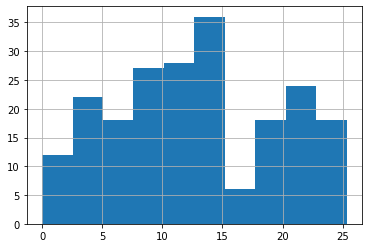

In [12]:
filt = df[["cycle", "fish_id", "quadrant", "sequence", "distance_cycle", "take"]]
filt["distance_cycle"].hist()
#filt[filt["distance_cycle"] > 20]


In [13]:
temp_max = df.groupby(["sequence", "cycle"])["ult"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"ult":"ult_max"})
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)


temp_min = df.groupby(["sequence", "cycle"])["ult"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"ult":"ult_min"})
df = df.merge(temp_min, on=["sequence", "cycle"]).set_axis(df.index)
df["ult_min"] = df["ult_min"].apply(lambda x: abs(x))



In [14]:
df.head(5)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,...,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min
frame_number,,,,,,,,,,,,,,,,,,,,,
1288,14.866069,"(638, 623)","(616, 599)","(648, 634)",1,332.5,1,"(440, 426, 408, 444)",12,0.211693,...,0.999681,0.998924,0.996407,1.0,NaN,NaN,0.00662,21.931712,1.004826,0.992916
1289,14.866069,"(641, 626)","(619, 601)","(651, 637)",1,331.0,1,"(440, 426, 408, 444)",12,0.196365,...,0.999428,1.000418,1.004417,1.0,0.008010,0.008010,0.00662,21.931712,1.004826,0.992916
1290,14.866069,"(644, 629)","(620, 607)","(654, 640)",1,333.5,1,"(440, 426, 408, 444)",12,0.281175,...,0.999181,0.997275,0.994311,1.0,-0.010106,0.010106,0.00662,21.931712,1.004826,0.992916
1291,14.866069,"(647, 633)","(625, 608)","(657, 644)",1,328.0,1,"(440, 426, 408, 444)",12,0.401063,...,0.999904,0.998719,0.992916,1.0,-0.001395,0.001395,0.00662,21.931712,1.004826,0.992916
1292,14.866069,"(650, 636)","(630, 609)","(660, 647)",1,332.5,1,"(440, 426, 408, 444)",12,0.198912,...,0.999937,1.001356,1.004826,1.0,0.011910,0.011910,0.00662,21.931712,1.004826,0.992916


In [15]:
df["amplitude_cycle"] = abs(df["ult_max"] - df["ult_min"])



In [16]:
df.head(6)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,...,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle
frame_number,,,,,,,,,,,,,,,,,,,,,
1288,14.866069,"(638, 623)","(616, 599)","(648, 634)",1,332.5,1,"(440, 426, 408, 444)",12,0.211693,...,0.998924,0.996407,1.0,NaN,NaN,0.00662,21.931712,1.004826,0.992916,0.01191
1289,14.866069,"(641, 626)","(619, 601)","(651, 637)",1,331.0,1,"(440, 426, 408, 444)",12,0.196365,...,1.000418,1.004417,1.0,0.008010,0.008010,0.00662,21.931712,1.004826,0.992916,0.01191
1290,14.866069,"(644, 629)","(620, 607)","(654, 640)",1,333.5,1,"(440, 426, 408, 444)",12,0.281175,...,0.997275,0.994311,1.0,-0.010106,0.010106,0.00662,21.931712,1.004826,0.992916,0.01191
1291,14.866069,"(647, 633)","(625, 608)","(657, 644)",1,328.0,1,"(440, 426, 408, 444)",12,0.401063,...,0.998719,0.992916,1.0,-0.001395,0.001395,0.00662,21.931712,1.004826,0.992916,0.01191
1292,14.866069,"(650, 636)","(630, 609)","(660, 647)",1,332.5,1,"(440, 426, 408, 444)",12,0.198912,...,1.001356,1.004826,1.0,0.011910,0.011910,0.00662,21.931712,1.004826,0.992916,0.01191
1293,14.866069,"(653, 639)","(631, 614)","(663, 650)",1,334.5,1,"(440, 426, 408, 444)",12,0.168501,...,0.999492,1.003149,1.0,-0.001677,0.001677,0.00662,21.931712,1.004826,0.992916,0.01191


In [17]:
#df=df.loc[df["speed_cycle"] < 110]
#df=df.loc[df["distance_cycle"] < 38]
#df=df.loc[df["amplitude_cycle"] < 160]

In [18]:
df["freq"] = df["speed_cycle"]/(df["amplitude_cycle"]*2)


#df=df.loc[(df["freq"] < 0.24 )]



df["wave_length"] = df["speed_cycle"]/df["freq"]

In [19]:
df["freq*ampli"] = df["amplitude_cycle"]*df["freq"]

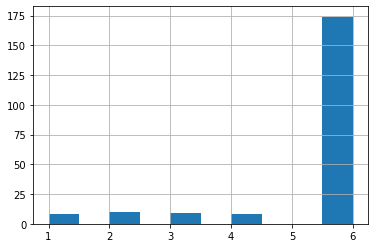

In [20]:
temp = df.groupby(["sequence", "cycle"])["pen"].count()
temp = temp.reset_index()
temp = temp.rename(columns={"pen":"c_counts"})
df = df.merge(temp, on=["sequence", "cycle"]).set_axis(df.index)


df["c_counts"].hist(bins=10)

df = df.loc[df["c_counts"] > 5]

<AxesSubplot:>

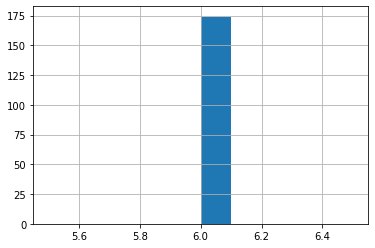

In [21]:
df["c_counts"].hist(bins=10)


In [22]:
df["fish_speed"] = df["distance_cycle"]/df["c_counts"]


In [23]:
df.head(6)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,...,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,fish_speed
frame_number,,,,,,,,,,,,,,,,,,,,,
1288,14.866069,"(638, 623)","(616, 599)","(648, 634)",1,332.5,1,"(440, 426, 408, 444)",12,0.211693,...,0.00662,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285
1289,14.866069,"(641, 626)","(619, 601)","(651, 637)",1,331.0,1,"(440, 426, 408, 444)",12,0.196365,...,0.00662,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285
1290,14.866069,"(644, 629)","(620, 607)","(654, 640)",1,333.5,1,"(440, 426, 408, 444)",12,0.281175,...,0.00662,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285
1291,14.866069,"(647, 633)","(625, 608)","(657, 644)",1,328.0,1,"(440, 426, 408, 444)",12,0.401063,...,0.00662,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285
1292,14.866069,"(650, 636)","(630, 609)","(660, 647)",1,332.5,1,"(440, 426, 408, 444)",12,0.198912,...,0.00662,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285
1293,14.866069,"(653, 639)","(631, 614)","(663, 650)",1,334.5,1,"(440, 426, 408, 444)",12,0.168501,...,0.00662,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285


In [24]:
df["fish_uid"] = df.apply(lambda x: str(x.quadrant) + str(x.fish_id), axis = 1 )

In [25]:
df.head(6)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,...,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,fish_speed,fish_uid
frame_number,,,,,,,,,,,,,,,,,,,,,
1288,14.866069,"(638, 623)","(616, 599)","(648, 634)",1,332.5,1,"(440, 426, 408, 444)",12,0.211693,...,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285,11
1289,14.866069,"(641, 626)","(619, 601)","(651, 637)",1,331.0,1,"(440, 426, 408, 444)",12,0.196365,...,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285,11
1290,14.866069,"(644, 629)","(620, 607)","(654, 640)",1,333.5,1,"(440, 426, 408, 444)",12,0.281175,...,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285,11
1291,14.866069,"(647, 633)","(625, 608)","(657, 644)",1,328.0,1,"(440, 426, 408, 444)",12,0.401063,...,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285,11
1292,14.866069,"(650, 636)","(630, 609)","(660, 647)",1,332.5,1,"(440, 426, 408, 444)",12,0.198912,...,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285,11
1293,14.866069,"(653, 639)","(631, 614)","(663, 650)",1,334.5,1,"(440, 426, 408, 444)",12,0.168501,...,21.931712,1.004826,0.992916,0.01191,0.2779,0.02382,0.00331,6,3.655285,11


In [26]:
df["freq_veloc_esp"] = df["amplitude_cycle"]/df["fish_speed"]
df["amp_veloc_esp"] = df["freq"]/df["fish_speed"]

In [27]:
graphs = df.groupby(["sequence", "cycle"])
to_graphs = graphs.head(1)
len(to_graphs)

29

Decimal Representation p: 0.077494947410338008153551925261
Decimal Representation r: 0.333045944144633732086902000447


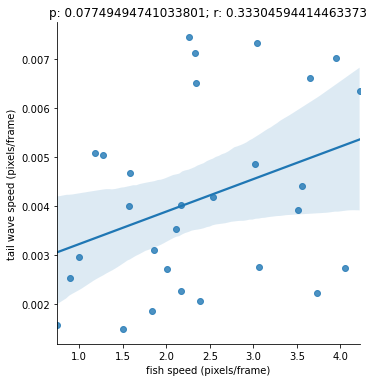

In [28]:
#to_graphs=to_graphs.loc[to_graphs["speed_cycle"] < 140]

#from scipy.stats import spearmanr
from scipy.stats.mstats import spearmanr


ax = sns.lmplot(data=to_graphs, x="fish_speed", y="speed_cycle") #.set(title='p: 0.00000050; r: 0.35')
r, pvalue = spearmanr(to_graphs["fish_speed"], to_graphs["speed_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave speed (pixels/frame)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(f"Decimal Representation p: {pvalue:.30f}")
print(f"Decimal Representation r: {r:.30f}")

<AxesSubplot:>

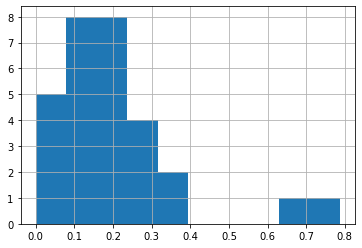

In [29]:

to_graphs["tail_uniformity"].hist()



0.45040882761011547
Decimal Representation of p: 0.450408827610115469752827266348
Decimal Representation of r: -0.145812807881773420781712502503


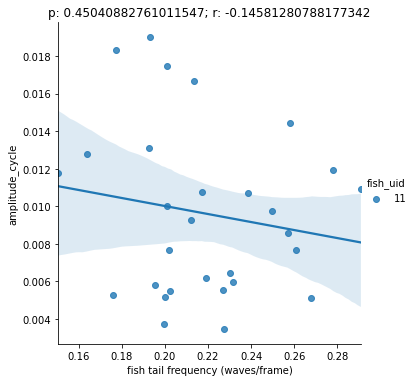

In [30]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=to_graphs, x="freq", y="amplitude_cycle", hue="fish_uid")
r, pvalue = spearmanr(to_graphs["freq"], to_graphs["amplitude_cycle"])
ax.set(xlabel='fish tail frequency (waves/frame)', ylabel='amplitude_cycle').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.17934171268761095
Decimal Representation of p: 0.179341712687610954635175630756
Decimal Representation of r: 0.256435523561067857389872415297


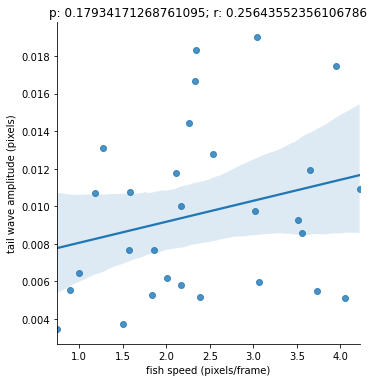

In [31]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=to_graphs, x="fish_speed", y="amplitude_cycle")
r, pvalue = spearmanr(to_graphs["fish_speed"], to_graphs["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave amplitude (pixels)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [32]:
to_graphs.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_uniformity', 'tail_coords', 'take', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle', 'distance_cycle', 'ult_max',
       'ult_min', 'amplitude_cycle', 'freq', 'wave_length', 'freq*ampli',
       'c_counts', 'fish_speed', 'fish_uid', 'freq_veloc_esp',
       'amp_veloc_esp'],
      dtype='object')

0.07749494741033801
Decimal Representation of p: 0.077494947410338008153551925261
Decimal Representation of r: 0.333045944144633732086902000447


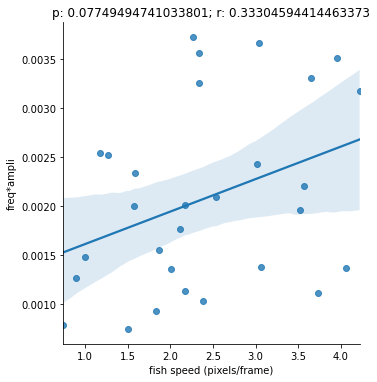

In [33]:
#df=df.loc[df["amp/freq"] < 1]


from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(to_graphs["fish_speed"], to_graphs["freq*ampli"])

ax = sns.lmplot(data=to_graphs, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='freq*ampli')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.01241352077024673
Decimal Representation of p: 0.012413520770246730048902428223
Decimal Representation of r: 0.189185861762632162585973105706


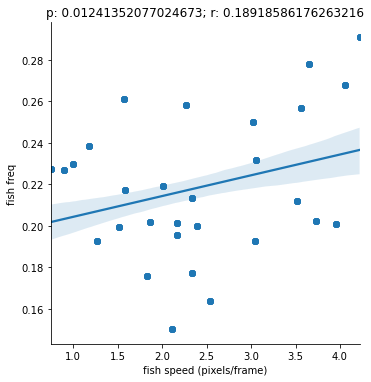

In [34]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(df["fish_speed"], df["freq"])
ax = sns.lmplot(data=df, x="fish_speed", y="freq").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='fish freq')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

7.109644114502636e-06
Decimal Representation of p: 0.000007109644114502636355265586
Decimal Representation of r: 0.333045944144633732086902000447


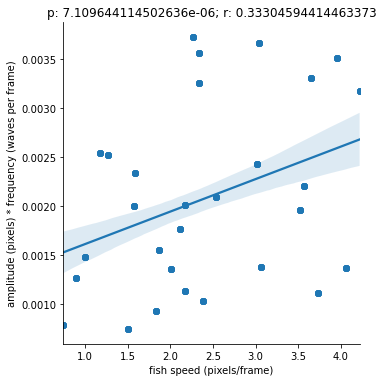

In [35]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(df["fish_speed"], df["freq*ampli"])

ax = sns.lmplot(data=df, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude (pixels) * frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

[Text(0.5, 0, ''), Text(0, 0.5, '')]

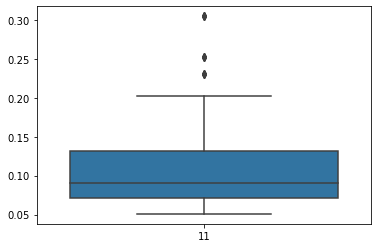

In [36]:

ax = sns.boxplot(data=df, x="fish_uid", y="amp_veloc_esp")
ax.set(xlabel='', ylabel='')


[Text(0.5, 0, ''), Text(0, 0.5, '')]

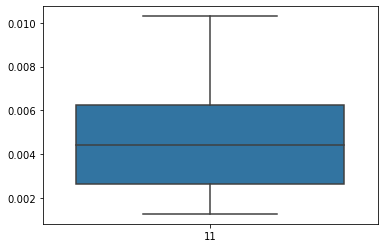

In [37]:
ax = sns.boxplot(data=df, x="fish_uid", y="freq_veloc_esp")
ax.set(xlabel='', ylabel='')
